<a href="https://colab.research.google.com/github/Afif-Ghifari/ML_S5_2025/blob/main/JS04_SOAL_KUIS1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama  : Muhammad Afif Al Ghifari <br>
Kelas : TI-3H <br>
NIM   : 2341720168**

# Pengantar

Pada Kuis 1 ini Anda diminta untuk melakukan proses explorartory data analysis (EDA) dan pra pengolahan data pada dataset "Census Income". Dataset ini merupakan data tabular yang memiliki beberapa nilai yang hilang (missing value) dan nama variabel (fitur) yang perlu disesuaikan.

Untuk membantu Anda, notebook ini akan memberikan kode awal untuk proses download data, load data, dan inspeksi informasi terkait dengan metadata.

# Load Data and Inspect Metadata

In [1]:
# Install UCI REPO Library
!pip install -q ucimlrepo

In [2]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [3]:
# fetch data
adult_income = fetch_ucirepo(id=2)

In [4]:
# Data
X = adult_income.data.features
y = adult_income.data.targets

# Concate Features and Target
df = pd.concat([X, y], axis=1)

# Show Top 5
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# Data Size
df.shape

(48842, 15)

In [6]:
# Inspect metadata
adult_income.metadata

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Tue Sep 24 2024',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was ex

# Bagian 1 - Data Loading dan Data Imputation

## Soal 1 (5 poin)
1.   Lakukan inspeksi profile data
2.   **Variabel apa** yang memiliki **nilai yang hilang** (missing value) dan **berapa** jumlahnya?



In [10]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan
print('-------Inspeksi jumlah data-------')
df.info()
print('-------Inspeksi nilai statistik-------')
df.describe()

-------Inspeksi jumlah data-------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
-------Inspeksi nilai statistik-------


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
print('-------Variabel dengan missing value-------')
df.isnull().sum()

-------Variabel dengan missing value-------


,0
age,0
workclass,963
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,966
relationship,0
race,0
sex,0


## Soal 2 (5 poin)
1. Lakukan proses data imputation pada fitur yang memiliki data yang hilang
2. Cek kembali apakah masih terdapat data yang hilang

In [17]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan
# print('-------Input missing value-------')
df['workclass'].fillna(value='private', inplace=True)
df['occupation'].fillna(value='unknown', inplace=True)
df['native-country'].fillna(value=df['native-country'].mode, inplace=True)
print('-------Cek missing value-------')
df.isnull().sum()

-------Cek missing value-------


,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


## Soal 3 (10 poin)
Inspeksi semua fitur kualitatif. Jika terdapat value yang **tidak sesuai**, **ganti dengan 'Others'** atau yang sesuai atau jika terdapat duplikasi karena **kesalahan penulisan**, lakukan penyesuaian.

In [62]:
# Jawab Soal 3
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

# 1. Cari kolom kualitatif
categorical_cols = df.select_dtypes(include='object').columns
print("Kolom kualitatif:", categorical_cols.tolist())

# 2. Tampilkan unique values dari tiap kolom
for col in categorical_cols:
    print(f"\nKolom: {col}")
    print(df[col].unique())

for col in categorical_cols:
    # sesuaikan duplikasi/penulisan salah
    if col == "marital-status":
        df[col] = df[col].replace({
            "maried-civ-spouse": "married-civ-spouse",
            "maried-spouse-absent": "married-spouse-absent"
        })

    if col == "occupation":
        # Jika ada kategori aneh, ubah ke "others"
        allowed = ["tech-support", "craft-repair", "sales", "exec-managerial",
                   "prof-specialty", "other-service", "machine-op-inspct",
                   "adm-clerical", "handlers-cleaners", "transport-moving",
                   "priv-house-serv", "protective-serv", "armed-forces"]
        df[col] = df[col].apply(lambda x: x if x in allowed else "others")

Kolom kualitatif: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'native-country']

Kolom: workclass
['state-gov' 'self-emp-not-inc' 'private' 'federal-gov' 'local-gov' '?'
 'self-emp-inc' 'without-pay' 'never-worked']

Kolom: education
['bachelors' 'hs-grad' '11th' 'masters' '9th' 'some-college' 'assoc-acdm'
 'assoc-voc' '7th-8th' 'doctorate' 'prof-school' '5th-6th' '10th'
 '1st-4th' 'preschool' '12th']

Kolom: marital-status
['never-married' 'married-civ-spouse' 'divorced' 'married-spouse-absent'
 'separated' 'married-af-spouse' 'widowed']

Kolom: occupation
['adm-clerical' 'exec-managerial' 'handlers-cleaners' 'prof-specialty'
 'other-service' 'sales' 'craft-repair' 'transport-moving' 'others'
 'machine-op-inspct' 'tech-support' 'protective-serv' 'armed-forces'
 'priv-house-serv']

Kolom: relationship
['not-in-family' 'husband' 'wife' 'own-child' 'unmarried' 'other-relative']

Kolom: race
['white' 'black' 'asian-pac-islander' 'amer-indian-eskimo' 

# Bagian 2 - Visual Inspection



## Soal 1 - Visualisasi Data (20 poin)
Lakukan inspeksi visual pada,
1. Pada kolom 'age' dengan menggunakan histrogram
2. Pada kolom 'education' education menggunakan barchart
3. Pada kolom 'income' terhadap 'hours_per_week' menggunakan boxplot (kelompokkan berdasarkan kelompok income)
4. Pada kolom 'age' terhadap 'capital-gain' dan 'capital-loss' dengan lineplot (1 lineplot 2 data)

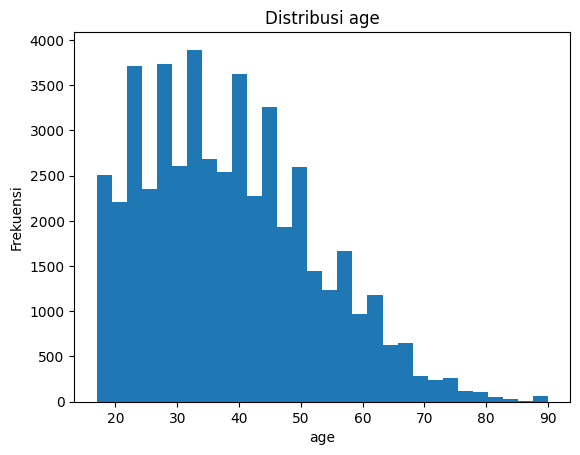

In [18]:
# Jawab 1.1 - Histrogram

plt.figure()
plt.hist(df['age'], bins=30)
plt.title(f'Distribusi age')
plt.xlabel('age'); plt.ylabel('Frekuensi')
plt.show()

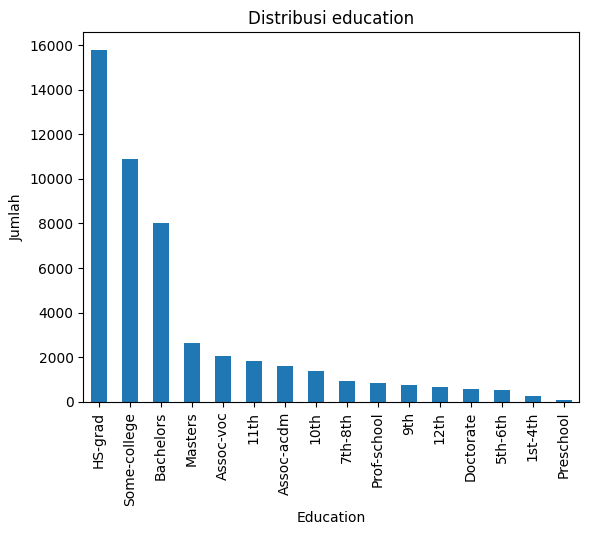

In [33]:
# Jawab 1.2 - Barchart

df['education'].value_counts(dropna=False).plot(kind='bar')
plt.title('Distribusi education')
plt.xlabel('Education')
plt.ylabel('Jumlah')
plt.show()

<Figure size 640x480 with 0 Axes>

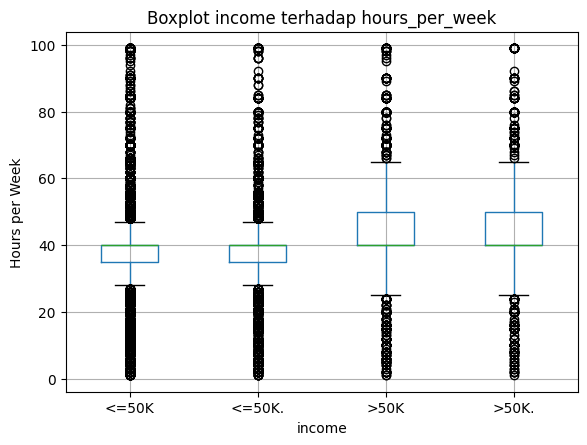

In [25]:
# Jawab 1.3 - Boxplot
plt.figure()
df.boxplot(column='hours-per-week', by='income')
plt.title('Boxplot income terhadap hours_per_week')
plt.suptitle('')
plt.ylabel('Hours per Week')
plt.show()

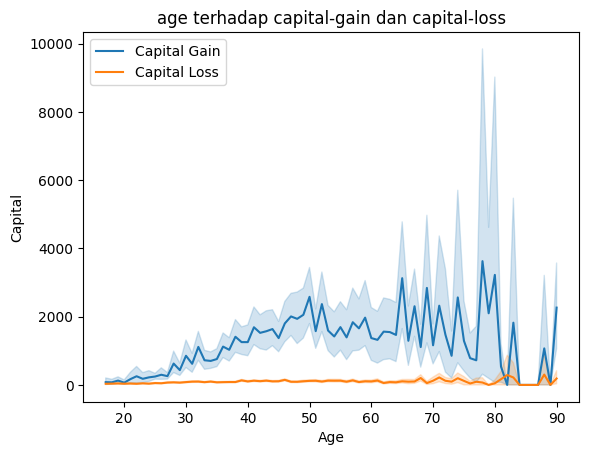

In [64]:
# Jawab 1.4 - Lineplot
plt.figure()
sns.lineplot(x='age', y='capital-gain', data=df, label='Capital Gain')
sns.lineplot(x='age', y='capital-loss', data=df, label='Capital Loss')
plt.title('age terhadap capital-gain dan capital-loss')
plt.xlabel('Age')
plt.ylabel('Capital')
plt.legend()
plt.show()

## Soal 2 - Analisis Visual (15 poin)
1. Fenomena apa yang terjadi pada distribusi data 'age'?
2. Jika terdapat data yang hilang pada variabel 'age', strategi apa yang Anda terapkan? Mengapa?
3. Berapa jumlah outlier pada setiap kategori 'income' berkaitan dengan 'hour-per-week'? Kategori apa yang paling banyak memiliki outlier?

In [36]:
# Jawab dengan komentar python

'''
  Bisa dengan multiple comment
  seperti ini
'''
'''
1) Distribusi data miring ke kanan karen terdapat beberapa nilai data yang
tinggi sehingga menyeret distribusi ke arah kanan.

2) Akan diisi nilai mean (rata-rata) dari kolom age, karena nilai mean akan
cenderung lebih dekat ke nilai asli yang tidak tercatat

3)

'''
outlier_counts = {}
for category in df['income'].unique():
    data_cat = df[df['income'] == category]['hours-per-week']
    Q1 = data_cat.quantile(0.25)
    Q3 = data_cat.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data_cat[(data_cat < lower) | (data_cat > upper)]
    outlier_counts[category] = len(outliers)

print("Jumlah outlier per kategori:")
print(outlier_counts)
print("Kategori dengan outlier terbanyak:", max(outlier_counts, key=outlier_counts.get))

Jumlah outlier per kategori:
{np.int64(0): 7809, np.int64(2): 510, np.int64(1): 3897, np.int64(3): 271}
Kategori dengan outlier terbanyak: 0


# Bagian 3 - Encoding Variabel Kategorical

## Soal 1 (5 poin)
Lakukan encoding pada 'Sex' dan 'Income'. 'Income' merupakan variabel target

In [34]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['income'] = le.fit_transform(df['income'])
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,0


# Bagian 4 - Analisis Korelasi

## Soal 1 (10 poin)
1. Lakukan analisis korelasi pada variabel 'age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', dan 'income' (yang sudah di-encoding)
2. Berdasarkan hasil korelasi, informasi apa yang dapat Anda interpretasikan?

In [38]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan
cols = ['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', 'income']
corr = df[cols].corr()

print(corr)

                     age  education-num  hours-per-week  capital-gain  \
age             1.000000       0.030940        0.071558      0.077229   
education-num   0.030940       1.000000        0.143689      0.125146   
hours-per-week  0.071558       0.143689        1.000000      0.082157   
capital-gain    0.077229       0.125146        0.082157      1.000000   
capital-loss    0.056944       0.080972        0.054467     -0.031441   
income          0.205173       0.291074        0.198890      0.195755   

                capital-loss    income  
age                 0.056944  0.205173  
education-num       0.080972  0.291074  
hours-per-week      0.054467  0.198890  
capital-gain       -0.031441  0.195755  
capital-loss        1.000000  0.129771  
income              0.129771  1.000000  


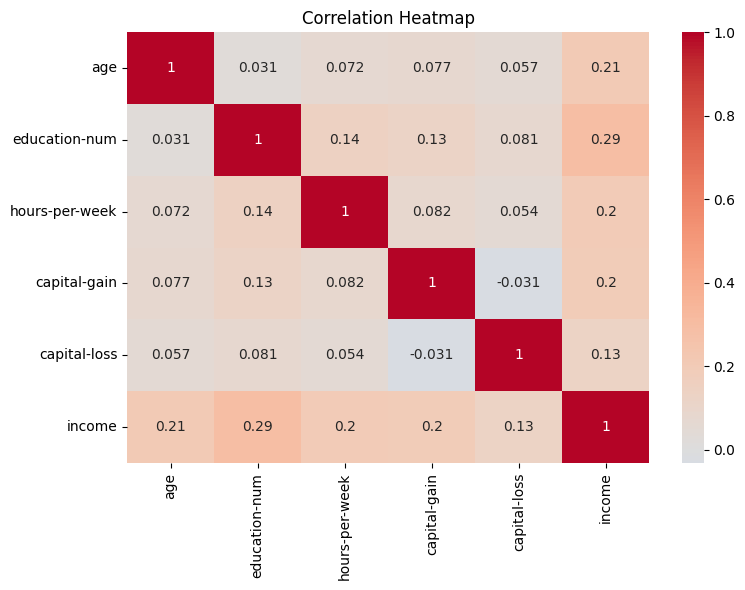

Faktor paling berpengaruh terhadap income adalah capital-gain dan education-num


In [41]:
# Hasil analisis jelaskan pada cell ini

import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

print('Faktor paling berpengaruh terhadap income adalah capital-gain dan education-num')

# Bagian 5 - Pra Pengolahan Data Pada Dataset MNIST

Pada bagian ini, Anda diminta untuk melakukan proses EDA dan pra pengolahan data sederhana pada dataset MNIST. Dataset MNIST merupakan data citra tulisan tangan untuk digil 0 hingga 9. Sebelum melakukan proses pengolahan, Anda akan dibantu dengan proses loading data dan inspeksi data.

Hints:
1. Hanya gunakan data **Test**
2. Anda perlu melakukan pengolahan terhadap semua data test (total 10k data). Anda dapat menggunakan function untuk mempermudah pekerjaan.

In [42]:
# Fetch data and inspect data shape
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load train & test split
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


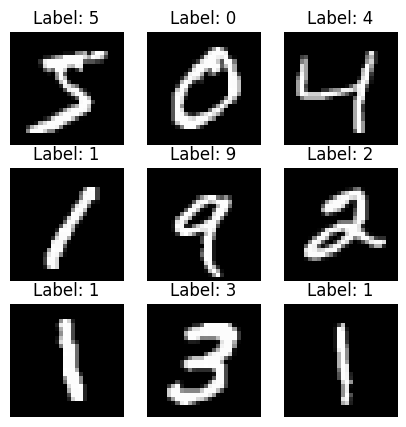

In [43]:
# Inspeksi Visual
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

## Soal 1 (10 poin)
1. Lakukan proses **upsampling** citra menjadi ukuran 32x32
2. Tampilakan 5 data hasil proses **upsampling**

Hint: Anda harus membuat array kosong untuk menampung hasil upsampling. Replace pada array X_test tidak dapat dilakukan karena data disimpan dalam bentuk ndarray yang memiliki ukuran fix (10000, (28,28))

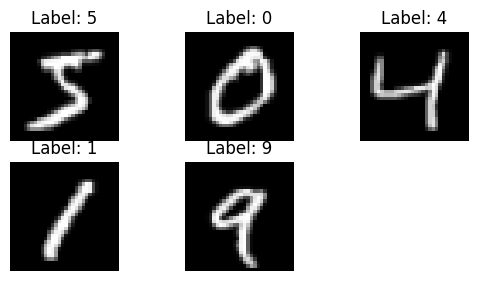

In [49]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan
# Inspeksi Visual
import cv2 as cv

X_test_upsampled = np.zeros((X_test.shape[0], 32, 32), dtype=np.uint8)

for i in range(len(X_test)):
    X_test_upsampled[i] = cv.resize(X_train[i], (32, 32))

plt.figure()
for i in range(5):
    plt.subplot(3,3,i+1)
    X_test_upsampled[i]
    plt.imshow(X_test_upsampled[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

## Soal 2 (10 poin)
Lakukan normalisasi nilai citra tiap piksel menjadi rentang 0-1

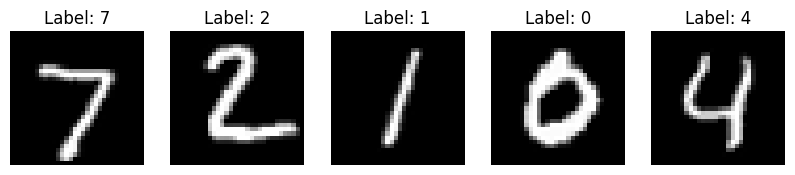

In [59]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    X_test_upsampled[i] =  X_test_upsampled[i]/ 255.0
    plt.imshow(X_test_upsampled[i], cmap="gray")
    plt.title(f"Label: {y_test[i]}")
    plt.axis("off")
plt.show()


## Soal 3 (10 poin)
Ubah metriks citra menjadi array 1 dimensi. Lakukan pada semua data test yang sudah di resize dan normalisasi.

Hint: Anda harus membuat holder array kosong untuk menampung hasilnya.

In [57]:
# Jawab Soal 3
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

X_test_flatten = np.zeros((X_test_upsampled.shape[0], 32*32), dtype=np.float32)

for i in range(len(X_test_upsampled)):
    X_test_flatten[i] = X_test_upsampled[i].flatten()

print("Shape setelah flatten:", X_test_flatten.shape)

# Tampilkan 5 sampel pertama (dalam bentuk array 1D)
for i in range(5):
    print(f"Data ke-{i}, label={y_test[i]}")
    print(X_test_flatten[i][:10])
    print("...")

Shape setelah flatten: (10000, 1024)
Data ke-0, label=7
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
...
Data ke-1, label=2
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
...
Data ke-2, label=1
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
...
Data ke-3, label=0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
...
Data ke-4, label=4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
...
